In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.signal import argrelextrema
from scipy.spatial.distance import euclidean
from tqdm import tqdm
from umap.umap_ import UMAP
from joblib import Parallel, delayed
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [9]:
# Ingolstadt 21

reward = []
reward2 = []
reward3 = []
reward4 = []
wait = []
wait2 = []
wait3 = []
wait4 = []
speed = []
speed2 = []
speed3 = []
speed4 = []
for i in range(1, 100):
    tree = ET.parse('results/MAXPRESSURE-tr0-ingolstadt21-21-mplight-wait/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait.append(float(vehicle_trip_statistics.get('waitingTime')))
    speed.append(float(vehicle_trip_statistics.get('speed')))
    df = pd.read_csv('results/MAXPRESSURE-tr0-ingolstadt21-21-mplight-wait/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward.append(round(df.values.sum(), 2))


    tree = ET.parse('results/IDQN-tr0-ingolstadt21-21-drq_norm-wait_norm/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait2.append(float(vehicle_trip_statistics.get('waitingTime')))
    speed2.append(float(vehicle_trip_statistics.get('speed')))
    df = pd.read_csv('results/IDQN-tr0-ingolstadt21-21-drq_norm-wait_norm/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward2.append(round(df.values.sum(), 2))

    tree = ET.parse('results/MPLight-tr0-ingolstadt21-21-mplight-pressure/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait3.append(float(vehicle_trip_statistics.get('waitingTime')))
    speed3.append(float(vehicle_trip_statistics.get('speed')))
    df = pd.read_csv('results/MPLight-tr0-ingolstadt21-21-mplight-pressure/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward3.append(round(df.values.sum(), 2))

    tree = ET.parse('results/IPPO-tr0-ingolstadt21-21-drq_norm-wait_norm/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait4.append(float(vehicle_trip_statistics.get('waitingTime')))
    speed4.append(float(vehicle_trip_statistics.get('speed')))
    df = pd.read_csv('results/IPPO-tr0-ingolstadt21-21-drq_norm-wait_norm/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward4.append(round(df.values.sum(), 2))

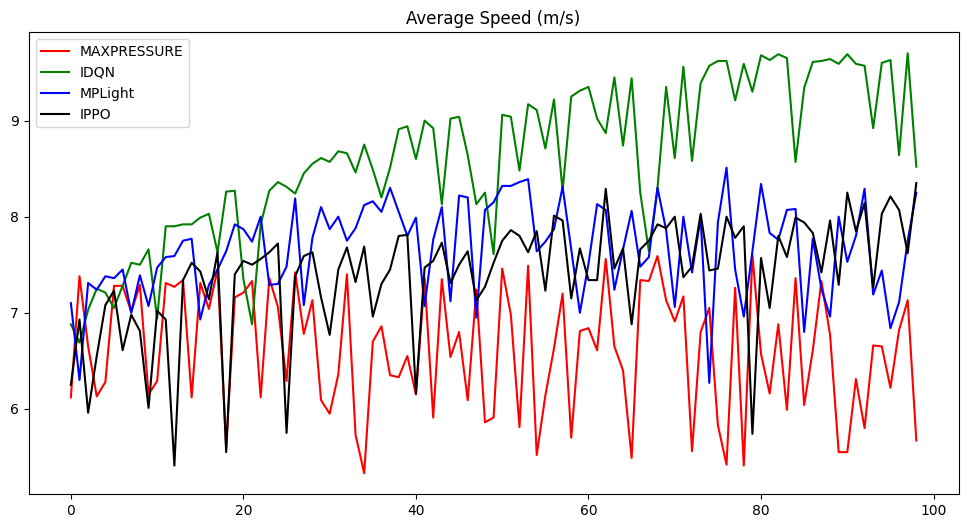

In [15]:
# Plot Training Result
plt.figure(figsize=(12, 6))

#reward = np.array(reward)
#incident = np.array(incident)

# incident가 0이 아닌 값을 가지는 인덱스 찾기
#non_zero_indices = np.where(incident != 0)[0]

# reward와 incident 데이터 플롯
plt.plot(speed, label='MAXPRESSURE', color='red')
plt.plot(speed2, label='IDQN', color='green')
plt.plot(speed3, label='MPLight', color='blue')
plt.plot(speed4, label='IPPO', color='black')
# incident가 0이 아닌 곳에 해당하는 reward 값에 점 찍기
plt.title("Average Speed (m/s)")

# 그래프 레이블 추가
plt.legend()

# 그래프 출력
plt.show()

In [ ]:
# Cologne 8

reward = []
reward2 = []
reward3 = []
reward4 = []
wait = []
wait2 = []
wait3 = []
wait4 = []
speed = []
speed2 = []
speed3 = []
speed4 = []
for i in range(1, 101):
    tree = ET.parse('results/MAXPRESSURE-tr0-cologne8-0-mplight-wait/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait.append(float(vehicle_trip_statistics.get('waitingTime')))
    df = pd.read_csv('results/MAXPRESSURE-tr0-cologne8-0-mplight-wait/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward.append(round(df.values.sum(), 2))


    tree = ET.parse('results/IDQN-tr0-cologne8-0-drq_norm-wait_norm/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait2.append(float(vehicle_trip_statistics.get('waitingTime')))
    df = pd.read_csv('results/IDQN-tr0-cologne8-0-drq_norm-wait_norm/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward2.append(round(df.values.sum(), 2))

    tree = ET.parse('results/MPLight-tr0-ingolstadt21-21-mplight-pressure/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait3.append(float(vehicle_trip_statistics.get('waitingTime')))
    df = pd.read_csv('results/MPLight-tr0-ingolstadt21-21-mplight-pressure/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward3.append(round(df.values.sum(), 2))

    tree = ET.parse('results/MPLight-tr0-cologne8-0-mplight-pressure/stats_' + str(i) + '.xml')
    root = tree.getroot()
    vehicle_trip_statistics = root.find('vehicleTripStatistics')
    wait4.append(float(vehicle_trip_statistics.get('waitingTime')))
    df = pd.read_csv('results/MPLight-tr0-cologne8-0-mplight-pressure/metrics_' + str(i) + '.csv')
    df = df.iloc[:, 1:]
    df = df.iloc[:, :21]
    new_df = pd.DataFrame([df.columns.tolist()], columns=df.columns)
    df = pd.concat([new_df, df], ignore_index=True)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x.split(': ')[1].replace('}', '') if isinstance(x, str) else x)
    df = df.astype(float)
    reward4.append(round(df.values.sum(), 2))